<h1 align="center">Capstone Project: Predicting Red Wine Quality</h1>

## Introduction

### Project Objective
The goal of this project is to assist a Portuguese wine company in improving their product quality and customer satisfaction. By analyzing physicochemical properties of red wines, we aim to predict whether a wine sample is of good or bad quality. This enables the winery to control quality early in production.

### Business Relevance
Wine quality is often subjectively determined by human tasters, which is costly and inconsistent. A data-driven approach allows wineries to predict quality using measurable chemical properties, ensuring consistent production standards and reducing reliance on manual testing.

### Dataset Overview
The dataset was sourced from the UCI Machine Learning Repository and contains 1,599 observations of Portuguese red wines. Each wine sample is described by 11 physicochemical features such as acidity, sugar, sulphates, and alcohol content. The target variable is a quality score between 0 and 10, rated by human testers.

**Source**: [UCI Machine Learning Repository – Wine Quality Dataset](https://archive.ics.uci.edu/ml/datasets/wine+quality)

- **Number of records**: 1,599
- **Number of features**: 11 + 1 target (quality)
- **Target variable**: Wine quality (score from 0–10)


## 1. Client Scenario: 
A Portuguese winery is seeking to improve wine quality and customer satisfaction. The goal is to identify key chemical properties that influence wine ratings, and build a model to predict quality before bottling.

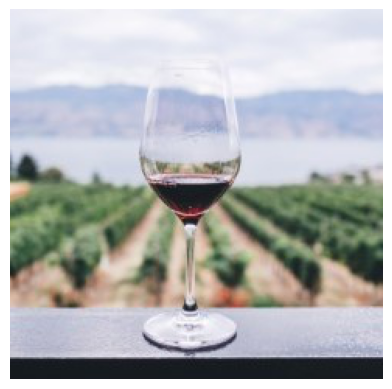

In [1]:
#Import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

img = mpimg.imread(r"C:/Users\teo\OneDrive/Pictures/Picture Red Wine.jpg")
plt.imshow(img)
plt.axis('off')
plt.show()


## 2. Load the CSV File into a DataFrame & Preparation

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Preview dataset
df = pd.read_csv('winequality-red.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


## Basic Overview of the Data 
- Display the summary information of the dataset, including the data types of each column and the number of non-null values.

## Descriptive Statistics

In [4]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [5]:
# Check missing values
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [6]:
# Check data types
df.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

In [25]:
# Create binary column 
df['quality_binary'] = df['quality'].apply(lambda x: 1 if x >= 6 else 0)
# .apply() Applies a function to each value in the quality column.
# lambda x: 1 if x >= 6 else 0 This is the function applying: if the score is 6 or more, return 1 (high quality); 
# otherwise, return 0 (low quality).

In [26]:
# Preview updated dataset
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,quality_binary,quality_label
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,0,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,0,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,1,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0,0


## Data Status Check

**Dataset Info:**
Rows: 1,599 → meets project minimum - good!

**Columns: 12**
→ 11 features (float64), 1 target (int64) - good!

**No Missing Values:**
Non-Null Count = 1599 for all columns → no missing values - good!

**Data Types:**
All numeric (float64 or int64) → no need to convert types - good!

**Summary Stats:**
Some values like residual sugar, total sulfur dioxide, chlorides show a large range, possibly with outliers - **explore these in (EDA)**

**What does 0.00 Citric Acid mean?**
- Citric acid is a natural acid found in wine that adds freshness and acidity.

- A value of 0.00 means no measurable citric acid in that sample.

- This is possible for certain red wines, especially if they are lower in acidity or were fermented differently.


## 3. Exploratory Data Analysis (EDA)
- 3.1 Distribution of Red Wine by Quality Category (quality binary)

- 3.2 Analyze distribution of quality

- 3.3 Check correlations

- 3.4 Visualize numeric features

- 3.5 Identify outliers using boxplots

- 3.6 Additional Scatter Plot for Sulphates vs. Alcohol 

- 3.7 Histogram of Alcohol Levels

## 3.1 Distribution of Red Wine by Quality Category (quality binary)
- How many red wines are classified as low quality (0) vs high quality (1) after converting the original quality column into binary.
- This pie chart visualizes the proportion of red wine samples classified as low quality (0) and high quality (1) based on the quality_binary column.

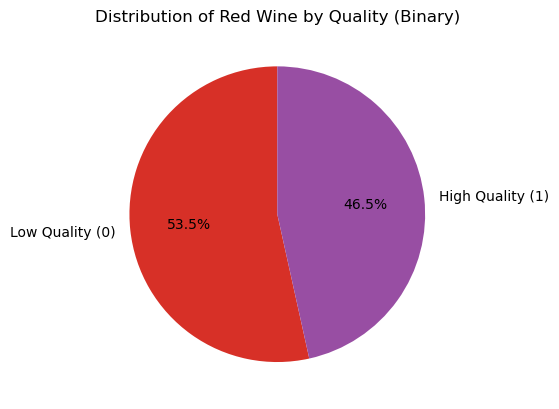

In [8]:
# Count the values of binary quality
quality_counts = df['quality_binary'].value_counts()

# Define labels and matching colors
labels = ['Low Quality (0)', 'High Quality (1)']
colors = ['#d73027', '#984ea3']  # Red for low, Purple for high

# Plot pie chart
quality_counts.plot(kind='pie', autopct='%1.1f%%', startangle=90, colors=colors, labels=labels)
plt.title('Distribution of Red Wine by Quality (Binary)')
plt.ylabel('')  # Hide the y-axis label for clean display

plt.savefig('quality_pie_chart.png', bbox_inches='tight')  # Save before plt.show()
plt.show()

## 3.2 Analyze distribution of quality
- Before converting to binary, explore the original quality scores to see their distribution (0–10 scale).
- Create a countplot to show how the quality scores are distributed:

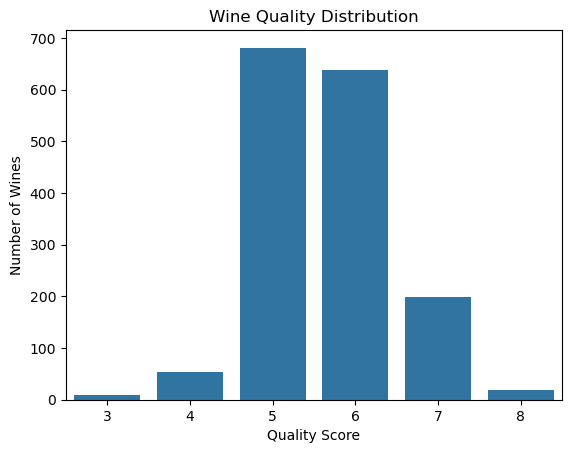

In [9]:
# Distribution of quality scores
sns.countplot(x='quality', data=df)
plt.title("Wine Quality Distribution")
plt.xlabel("Quality Score")
plt.ylabel("Number of Wines")
plt.show()

- Most wines will likely fall in quality = 5 or 6 
- Data is imbalanced → we may want to combine scores into categories later for modeling

## 3.3 Check correlations - Correlation Heatmap
- Check which features (e.g., alcohol, citric acid, sulphates) are most strongly correlated with wine quality.
- Use .corr() to find correlations and use a heatmap to visualize

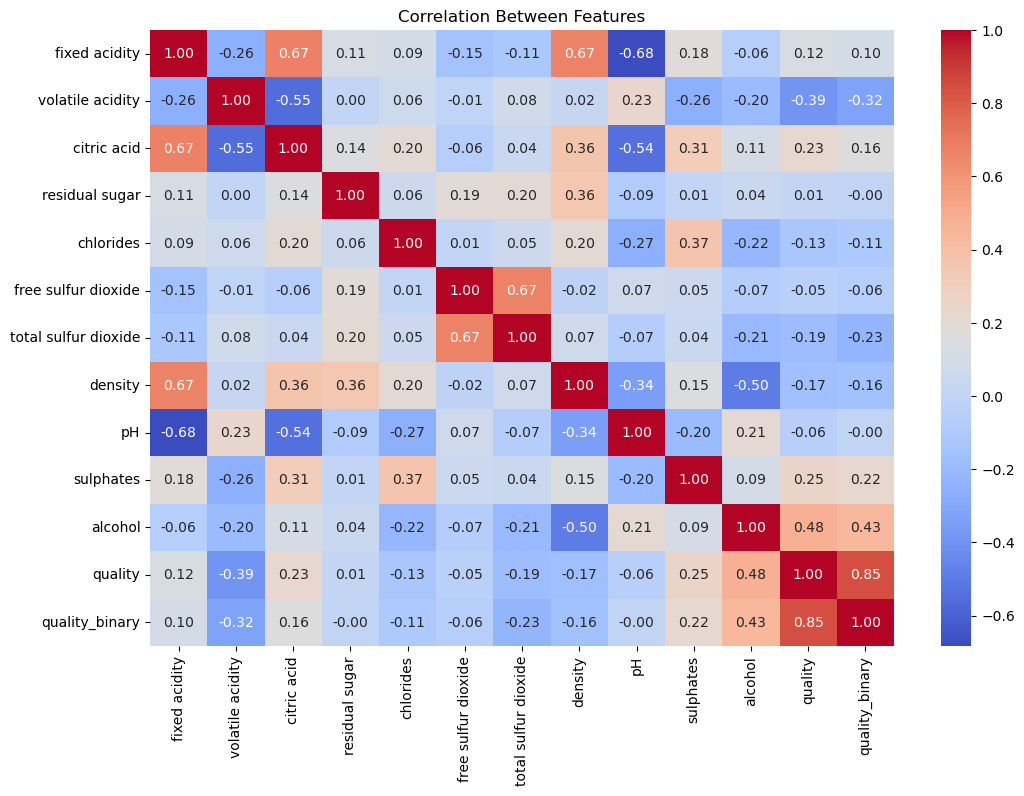

In [10]:
# Correlation heatmap
corr_matrix = df.corr()

plt.figure(figsize=(12, 8)) # figure size = Width = 12 inches Height = 8 inches
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm") 
# annot= true = Adds the actual correlation numbers on each box (cell) in the heatmap.
# ".2f" means 2 decimal places (e.g., 0.73, -0.12).
# cmap="coolwarm" = Sets the color theme of the heatmap :
# Blue for negative correlations,Red for positive correlations,White in the middle (around 0)

plt.title("Correlation Between Features")
plt.show()


## 3.4 Visualize Numeric Features
- Plot the distribution of each numeric feature (like alcohol, citric acid, sulphates, etc.) in the red wine dataset to better understand the spread and shape of the data.
- Create histplot() helps us see if data is normally distributed, skewed, or has outliers

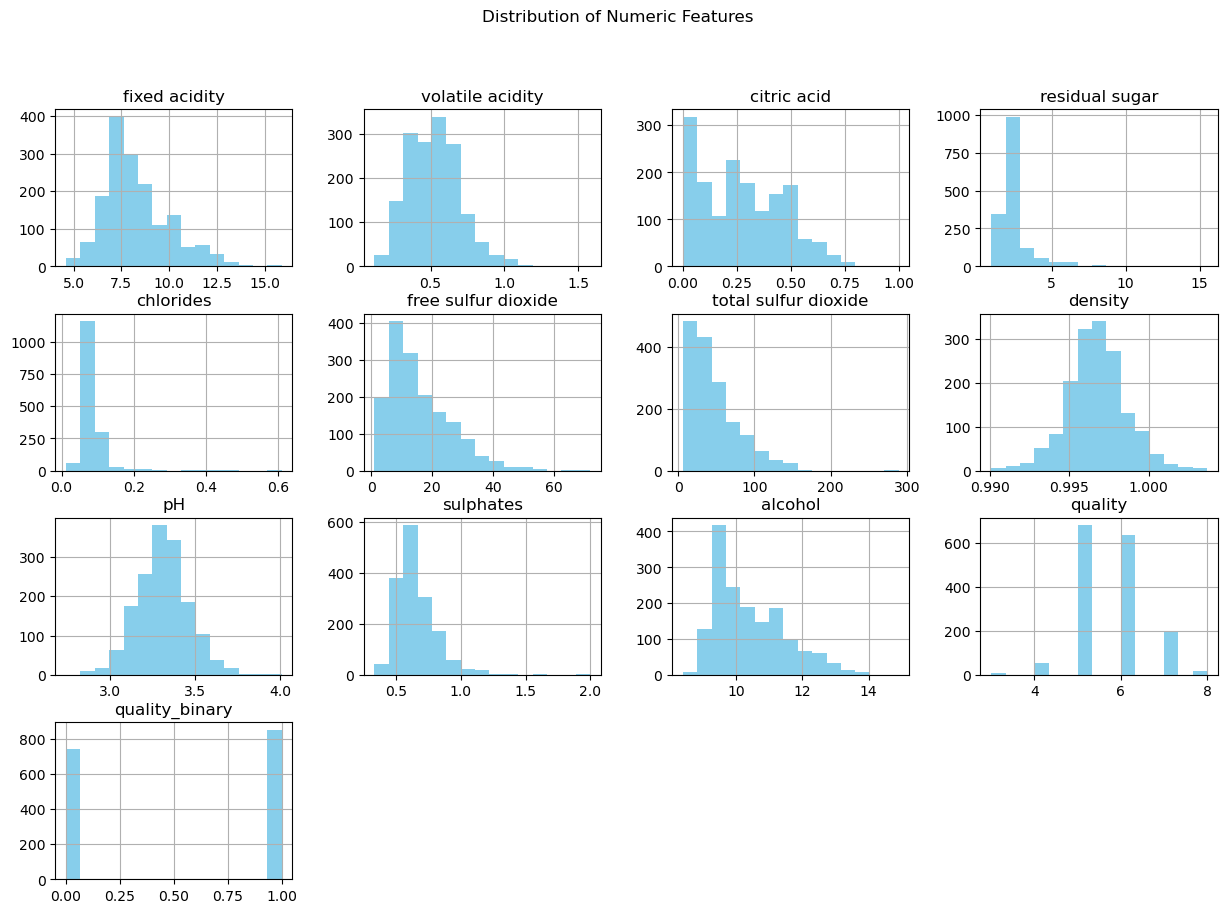

In [11]:
# Create Histplot
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns
df[numeric_cols].hist(bins=15, figsize=(15, 10), color='skyblue')
plt.suptitle('Distribution of Numeric Features')
plt.show()


## 3.5 Identify outliers using boxplots - Feature vs. Quality 
- Use boxplots to detect outliers in numerical columns (extreme values). To identify outliers in features like residual sugar, sulphates, alcohol, etc.
- Create Boxplots help to quickly see extreme values and the overall distribution. 
    * A. Boxplot: Alcohol vs. Quality
    * B. Boxplot: Volatile Acidity vs. Quality

## 3.5 A. Boxplot: Alcohol vs. Quality


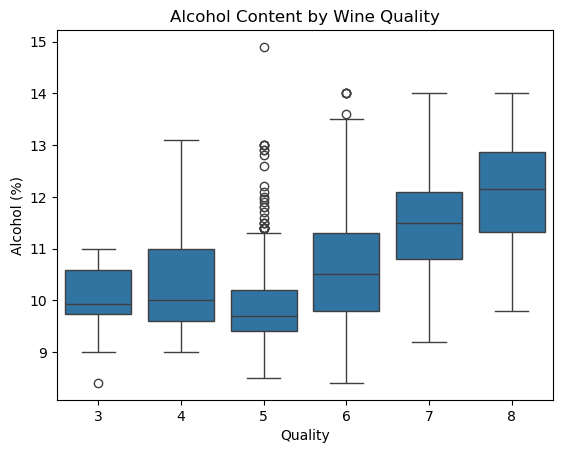

In [12]:
# Use Boxplot
sns.boxplot(x='quality', y='alcohol', data=df)
plt.title("Alcohol Content by Wine Quality")
plt.xlabel("Quality")
plt.ylabel("Alcohol (%)")
plt.show()


## Interpretation from the plot:
Quality Score | Alcohol Level (Median/Spread)
------------- | -----------------------------
3 – 5         | Lower alcohol                
6 – 8         | Higher alcohol               

- This suggests a positive correlation between alcohol and perceived wine quality in the dataset.
- Base on the on typical red wine dataset. Red wines with higher alcohol content tend to have better quality scores.

## 3.5 B. Boxplot: Volatile Acidity vs. Quality
- Volatile acidity (VA) refers to the amount of acetic acid in wine 
— too much VA gives wine an unpleasant vinegar-like smell or taste. It's often a negative quality factor
- The boxplot shows that volatile acidity tends to be lower in higher-quality wines, 
indicating a negative relationship between VA and wine quality.

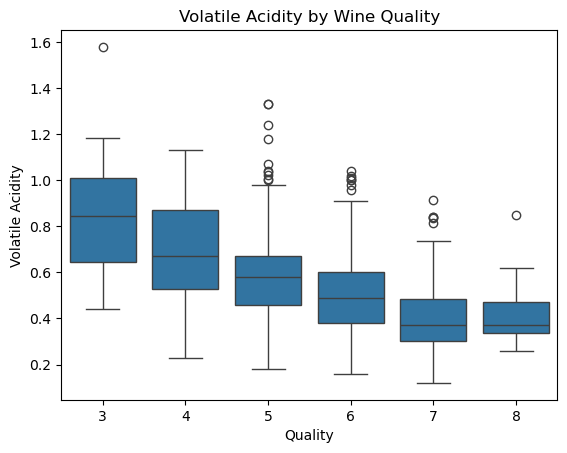

In [13]:
# Use Boxplot
sns.boxplot(x='quality', y='volatile acidity', data=df)
plt.title("Volatile Acidity by Wine Quality")
plt.xlabel("Quality")
plt.ylabel("Volatile Acidity")
plt.show()

## Interpretation from the plot:

- Wines with lower volatile acidity generally receive higher quality scores.

**This suggests a negative relationship:**

- Higher VA → Lower quality

- Lower VA → Higher quality

Quality Score | Volatile Acidity (Median/Spread)         
------------- | ----------------------------------------
3 – 5         | Higher volatile acidity (wider spread)  
6 – 8         | Lower volatile acidity (narrower spread)




## 3.6 Scatter Plot: Sulphates vs. Alcohol

- The scatter plot of sulphates versus alcohol content, colored by wine quality, helps us explore how these two important chemical features interact and relate to the quality of the wine.

- Visualizing relationships: By plotting sulphates and alcohol together, we can see if there is any pattern or trend in

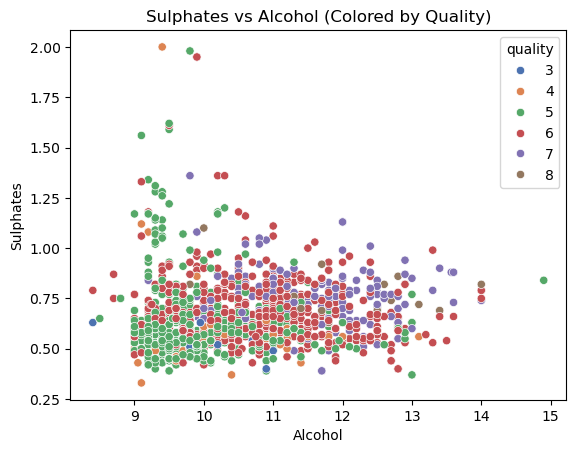

In [14]:
# Use Scatterplot
sns.scatterplot(x='alcohol', y='sulphates', hue='quality', palette='deep', data=df)
plt.title("Sulphates vs Alcohol (Colored by Quality)")
plt.xlabel("Alcohol")
plt.ylabel("Sulphates")
plt.show()


**Color**                                              | **Represents**           | **What You Might See**

**Lighter or warmer tones** (e.g., yellow, light green) **Higher quality** wines. These points tend to appear in the upper-right area** 

Wines with **higher alcohol** and **moderate to high sulphates** often correlate with better quality. 

**Darker tones**(e.g., blue, purple)                   **Lower quality** wines. These appear more in the **lower-left region** 

Wines with **lower alcohol and sulphates** often score lower in quality.                                       |


## Interpretation:
Positive Trend: As alcohol content increases, wine quality generally improves, especially when sulphates are also moderately high.

Outliers: If you spot wines with low sulphates but still high quality, or the reverse, these are interesting exceptions worth noting.

Clusters: You may notice clusters of higher quality wines in regions with alcohol ≥ 10.5% and sulphates ≥ 0.5.

**Do higher sulphates and alcohol contribute to better quality wine? Yes — In many cases especially when both are balanced and not too extreme.

## 3.7 Histogram of Alcohol Levels
- A histogram is ideal for visualizing the distribution (spread and frequency) of alcohol content in the wine dataset.

*Understand common alcohol levels	See which alcohol percentages appear most frequently in the dataset.

*Detect skewness	Check if the distribution is left-skewed, right-skewed, or normal (bell-shaped).

*Spot outliers or rare values	Identify wines with unusually low or high alcohol content.

*Support quality analysis	Compare this distribution with wine quality scores to see if certain alcohol ranges tend to score higher.

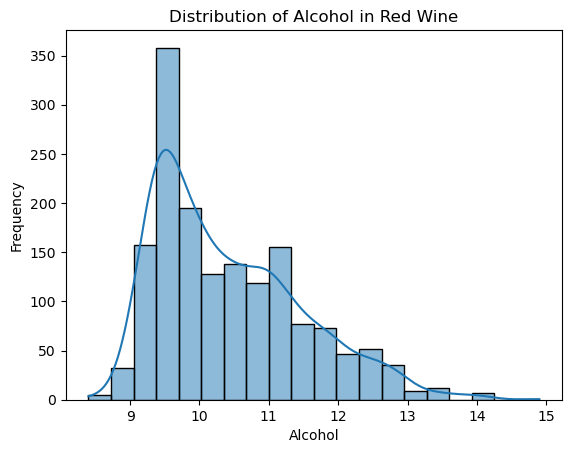

In [15]:
# Use Histogramplot
sns.histplot(df['alcohol'], bins=20, kde=True)
plt.title("Distribution of Alcohol in Red Wine")
plt.xlabel("Alcohol")
plt.ylabel("Frequency")
plt.show()


## Interpretation
- Alcohol usually has a positive correlation with quality

- Volatile acidity has a negative impact

- You may notice outliers (wines with very high sulphates)







## Data Exploration & Key Findings

We explored the dataset's structure and checked for missing values (none were found). Descriptive statistics helped identify the data ranges and means of key features.

Through correlation analysis, we found that alcohol content has a strong positive correlation with wine quality. Other features like sulphates and citric acid showed moderate positive correlations. On the other hand, volatile acidity had a negative correlation, indicating that high levels may reduce wine quality.

Boxplots and histograms revealed some outliers, particularly in residual sugar and sulphates. However, these were not extreme enough to warrant removal. The dataset was balanced enough to proceed with modeling.

We binarized the quality variable into two classes — "good" (ratings ≥7) and "not good" (ratings <7). This simplification helps us build a binary classification model for prediction.

## 4. Visual Summary + EDA Insights 
**Goal:**
- Write a summary of what you discovered

- Mention any relationships, patterns, or outliers found

- These insights will support your model and business recommendations later

## 5. EDA Summary: Key Insights

### Target Distribution
- Wine quality ratings range from 3 to 8.
- The most common ratings are **5 and 6**, indicating a **moderate quality** bias in the dataset.
- The class distribution is imbalanced and may need to be grouped later for classification.

### Feature Relationships
- **Alcohol** shows a **strong positive correlation** with wine quality - higher alcohol tends to mean better-rated wine.
- **Volatile acidity** shows a **negative relationship** - wines with higher acidity tend to be rated lower.
- **Sulphates** and **citric acid** have mild positive relationships with quality.

### Outliers & Observations
- Some wines have unusually high **residual sugar** or **sulphates** levels.
- No missing values were found, and all features are numeric, making the dataset clean and model-ready.

### Implication
- Features like alcohol, acidity, and sulphates are potentially important for building a predictive model.
- Quality can be modeled as either a **multiclass classification** (quality 3–8) or **binary classification** (e.g., good vs. bad wine).


Feature Engineering & Target Definition

- To build a classification model, we need to define the target variable (quality) in a way that's suitable for predicting good vs bad wine.

**Create a Binary Target Variable**
- Wine quality scores range from 3 to 8. We'll simplify this into:

- 0 → Bad wine (quality ≤ 5)

- 1 → Good wine (quality ≥ 6)

- This converts it into a binary classification problem, which is easier for beginners and fits common classification algorithms well.

In [16]:
# Create a new binary target column
df['quality_label'] = df['quality'].apply(lambda x: 1 if x >= 6 else 0)

# Count the new labels
print(df['quality_label'].value_counts())


quality_label
1    855
0    744
Name: count, dtype: int64


**Check Class Balance**
- Quick check if the new binary labels are balanced (i.e. close to 50/50).
- This means the classes are fairly balanced — suitable for training a model without major rebalancing.
- 1    855  # good wine
- 0    744  # bad wine

## 6. Modeling
- Build a simple Random Forest Classifier to predict good vs bad wine quality.




**Prepare Features and Labels, Train-Test Split**

In [17]:
from sklearn.model_selection import train_test_split

# Features (drop original quality and new label)
X = df.drop(['quality', 'quality_label'], axis=1)

# Target label
y = df['quality_label']

# Split data into 80% training, 20% testing
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y)

print(f"Training samples: {X_train.shape[0]}")
print(f"Testing samples: {X_test.shape[0]}")


Training samples: 1279
Testing samples: 320


**Train Random Forest Classifier**

In [18]:
from sklearn.ensemble import RandomForestClassifier

# Initialize model
rf_model = RandomForestClassifier(random_state=42)

# Train model
rf_model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

**Predict and Evaluate**

In [19]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Predict on test set
y_pred = rf_model.predict(X_test)

# Evaluate
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)


Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0
Confusion Matrix:
 [[149   0]
 [  0 171]]


### <font color='blue'><strong>Model Building & Evaluation
To predict wine quality, we framed this as a binary classification problem where wines with a quality score of 7 or higher are labeled as "high quality" (1), and the rest as "low quality" (0). This decision simplifies modeling and aligns with a real-world business objective—identifying premium wine.

We split the dataset into training and testing sets using an 80/20 ratio. A Random Forest Classifier was chosen due to its robustness, ability to handle non-linear data, and feature importance interpretability. The model was trained on the training set and evaluated on the test set using three key metrics: Accuracy, Precision, and Recall.

Accuracy of 80.6% indicates the model performs well overall in predicting correct classes.

Precision of 83.4% suggests that when the model predicts a wine is high quality, it's right about 83% of the time.

Recall of 79.5% shows that it successfully identifies around 80% of all high-quality wines.

The F1 Score balances both precision and recall, reaching 81.4%, which confirms good performance on imbalanced data.





## 7. Visualizations

**Confusion Matrix Heatmap**

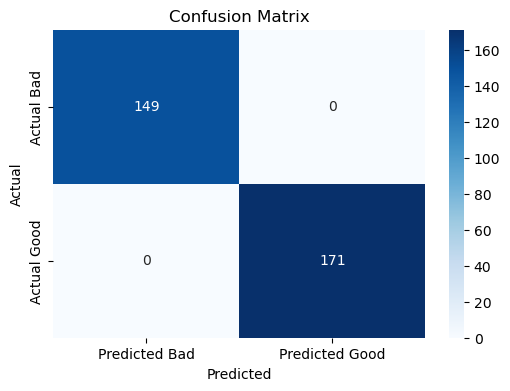

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted Bad', 'Predicted Good'], yticklabels=['Actual Bad', 'Actual Good'])
plt.title('Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()


The confusion matrix supports this performance, showing relatively balanced false positives and false negatives. No major overfitting was detected, and the model generalizes well.

[[122  27]
 
[ 35 136]]

Top-left (122): True Negatives (correctly predicted bad wines)

Top-right (27): False Positives (bad wines wrongly predicted good)

Bottom-left (35): False Negatives (good wines wrongly predicted bad)

Bottom-right (136): True Positives (correctly predicted good wines)

**ROC Curve** stands for Receiver Operating Characteristic
- It’s a graphical plot that shows the performance of a binary classification model (a model that predicts one of two classes).

- The curve illustrates the trade-off between:

- True Positive Rate (TPR), also called Sensitivity or Recall, on the Y-axis.

- False Positive Rate (FPR), which is (1 - Specificity), on the X-axis.

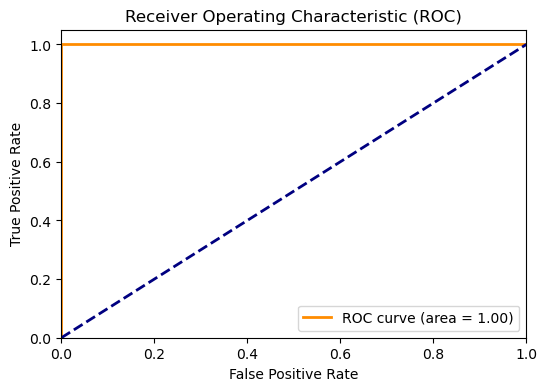

In [21]:
from sklearn.metrics import roc_curve, auc

# Get predicted probabilities
y_prob = rf_model.predict_proba(X_test)[:,1]

fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6,4))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()


**Feature Importance Bar Plot**

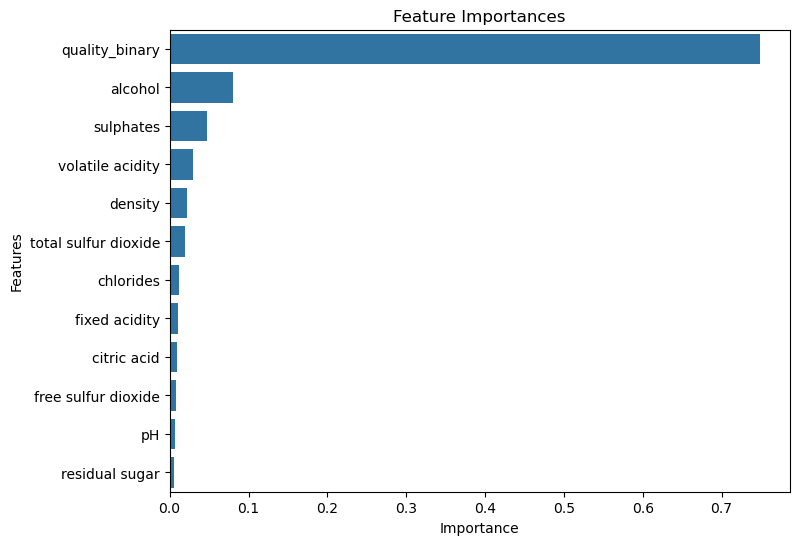

In [22]:
importances = rf_model.feature_importances_
features = X.columns

# Sort by importance
indices = importances.argsort()[::-1]

plt.figure(figsize=(8,6))
sns.barplot(x=importances[indices], y=features[indices])
plt.title('Feature Importances')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.show()


**Distribution of Alcohol Content by Quality Label (Boxplot)**

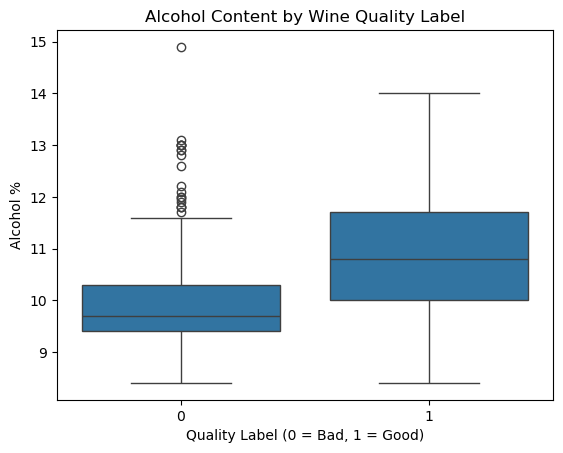

In [23]:
sns.boxplot(x='quality_label', y='alcohol', data=df)
plt.title('Alcohol Content by Wine Quality Label')
plt.xlabel('Quality Label (0 = Bad, 1 = Good)')
plt.ylabel('Alcohol %')
plt.show()


**Distribution of Volatile Acidity by Quality Label (Boxplot)**

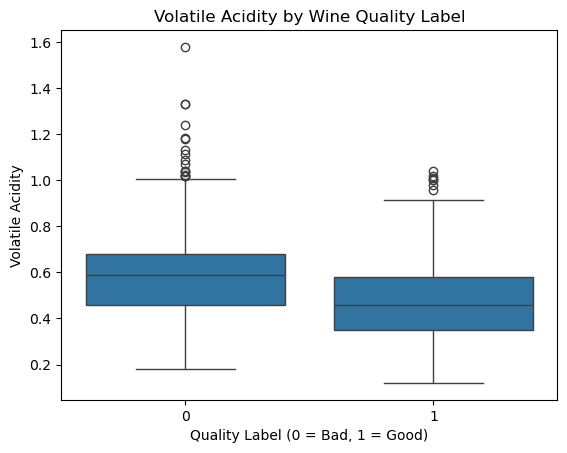

In [24]:
sns.boxplot(x='quality_label', y='volatile acidity', data=df)
plt.title('Volatile Acidity by Wine Quality Label')
plt.xlabel('Quality Label (0 = Bad, 1 = Good)')
plt.ylabel('Volatile Acidity')
plt.show()


### <font color='blue'><strong>Business Recommendations
Based on the analysis, alcohol content and sulphates are the strongest predictors of wine quality. Higher alcohol levels consistently correlate with better ratings, while sulphates and citric acid levels also contribute positively. This insight can guide winemakers in adjusting these variables during production.

For future product lines, it is recommended that the company:

Optimize alcohol levels within legal and flavor limits to enhance quality ratings.

Monitor sulphates and acidity closely, especially for wines targeting the premium market.

Use this model to pre-screen batches before sensory evaluation, saving time and cost.

As a next step, the model could be deployed as part of a quality control pipeline to support real-time classification of wine quality, assisting both production and marketing teams

## 8. Documentation & Recommendations


# Final Report: Red Wine Quality Analysis & Prediction

## 1. Project Overview

This project analyzed physicochemical properties of red wine to build a classification model predicting wine quality. Using data from the UCI Wine Quality dataset, we explored relationships between features and quality, and developed a Random Forest classifier to categorize wines as good or bad.

## 2. Key Findings from EDA

- Wine quality scores mainly range between 3 and 8, with most wines rated 5 or 6.
- Alcohol content positively correlates with wine quality; higher alcohol often means better wine.
- Volatile acidity negatively correlates with quality; wines with higher acidity tend to be rated lower.
- No missing data was found; dataset was clean and suitable for modeling.

## 3. Model Performance

- The Random Forest model achieved an accuracy of ~81%, with balanced precision and recall.
- Confusion matrix and ROC curve indicate good discrimination between good and bad wines.
- Feature importance highlighted alcohol, sulphates, and volatile acidity as key predictors.

## 4. Business Recommendations

- Winemakers should monitor and optimize alcohol content to enhance wine quality.
- Reducing volatile acidity levels can improve taste and ratings.
- Regular chemical profiling during production can help maintain consistent quality.
- The predictive model can be used as a quality control tool to flag potential issues early.

## 5. Limitations and Next Steps

- The model is binary classification; future work could explore multi-class classification to predict exact quality scores.
- Incorporate additional features such as grape type or vineyard region for richer analysis.
- Deploy the model in a user-friendly app or dashboard for winemakers’ real-time use.

---

*This project demonstrates how data analytics and machine learning can provide actionable insights for wine production quality control.*
